# Quiz Management System

---



## Objective


Create a Python-based application to design, manage, and conduct quizzes for students,
tracking their scores and providing feedback based on performance.



## Task 1
Quiz Setup

● Create a CSV file to store quiz questions with fields:

○ Question ID, Question Text, Options (A, B, C, D), Correct
Answer, Marks.



In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving quiz_questions.csv to quiz_questions.csv


In [ ]:
import pandas as pd

# Load the CSV into a DataFrame
quiz_df = pd.read_csv("quiz_questions.csv")

# Display the DataFrame
print(quiz_df.head())


   Question_ID                             Question_Text        Option_A  \
0            1                            What is 2 + 2?               3   
1            2            What is the capital of France?          Berlin   
2            3  Which planet is known as the Red Planet?           Earth   
3            4       What is the boiling point of water?            90°C   
4            5       What is the largest ocean on Earth?  Atlantic Ocean   

       Option_B       Option_C      Option_D Correct_Answer  Marks  
0             4              5             6              B      5  
1        Madrid          Paris          Rome              C      5  
2          Mars        Jupiter        Saturn              B      5  
3         100°C          110°C         120°C              B      5  
4  Indian Ocean  Pacific Ocean  Arctic Ocean              C      5  


In [ ]:
import pandas as pd

def load_quiz(file_path):
    """Load the quiz questions from a CSV file."""
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        print("File not found. Starting with an empty DataFrame.")
        return pd.DataFrame(columns=["Question_ID", "Question_Text", "Option_A", "Option_B", "Option_C", "Option_D", "Correct_Answer", "Marks"])

def save_quiz(df, file_path):
    """Save the quiz questions to a CSV file."""
    df.to_csv(file_path, index=False)
    print("Quiz saved successfully.")

def add_question(df):
    """Add a new question to the DataFrame."""
    question_id = input("Enter Question ID: ")
    question_text = input("Enter Question Text: ")
    option_a = input("Enter Option A: ")
    option_b = input("Enter Option B: ")
    option_c = input("Enter Option C: ")
    option_d = input("Enter Option D: ")
    correct_answer = input("Enter Correct Answer (A/B/C/D): ").upper()
    marks = input("Enter Marks for the question: ")

    new_question = {
        "Question_ID": question_id,
        "Question_Text": question_text,
        "Option_A": option_a,
        "Option_B": option_b,
        "Option_C": option_c,
        "Option_D": option_d,
        "Correct_Answer": correct_answer,
        "Marks": marks
    }

    df = pd.concat([df, pd.DataFrame([new_question])], ignore_index=True)
    print("Question added successfully.")
    return df

def update_question(df):
    """Update an existing question in the DataFrame."""
    question_id = input("Enter the Question ID to update: ")
    if question_id in df["Question_ID"].astype(str).values:
        print("Current question details:")
        print(df[df["Question_ID"] == question_id])

        print("Leave fields blank to keep the current value.")
        question_text = input("Enter new Question Text: ") or df.loc[df["Question_ID"] == question_id, "Question_Text"].values[0]
        option_a = input("Enter new Option A: ") or df.loc[df["Question_ID"] == question_id, "Option_A"].values[0]
        option_b = input("Enter new Option B: ") or df.loc[df["Question_ID"] == question_id, "Option_B"].values[0]
        option_c = input("Enter new Option C: ") or df.loc[df["Question_ID"] == question_id, "Option_C"].values[0]
        option_d = input("Enter new Option D: ") or df.loc[df["Question_ID"] == question_id, "Option_D"].values[0]
        correct_answer = input("Enter new Correct Answer (A/B/C/D): ").upper() or df.loc[df["Question_ID"] == question_id, "Correct_Answer"].values[0]
        marks = input("Enter new Marks: ") or df.loc[df["Question_ID"] == question_id, "Marks"].values[0]

        df.loc[df["Question_ID"] == question_id] = [question_id, question_text, option_a, option_b, option_c, option_d, correct_answer, marks]
        print("Question updated successfully.")
    else:
        print("Question ID not found.")
    return df

def delete_question(df):
    """Delete a question from the DataFrame."""
    question_id = input("Enter the Question ID to delete: ")
    if question_id in df["Question_ID"].astype(str).values:
        df = df[df["Question_ID"] != question_id]
        print("Question deleted successfully.")
    else:
        print("Question ID not found.")
    return df

def main():
    file_path = "quiz_questions.csv"
    quiz_df = load_quiz(file_path)

    while True:
        print("\nQuiz Management System")
        print("1. Add a new question")
        print("2. Update an existing question")
        print("3. Delete a question")
        print("4. Save and exit")

        choice = input("Enter your choice: ")

        if choice == "1":
            quiz_df = add_question(quiz_df)
        elif choice == "2":
            quiz_df = update_question(quiz_df)
        elif choice == "3":
            quiz_df = delete_question(quiz_df)
        elif choice == "4":
            save_quiz(quiz_df, file_path)
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()



Quiz Management System
1. Add a new question
2. Update an existing question
3. Delete a question
4. Save and exit
Enter your choice: 3
Enter the Question ID to delete: 5
Question deleted successfully.

Quiz Management System
1. Add a new question
2. Update an existing question
3. Delete a question
4. Save and exit
Enter your choice: 4
Quiz saved successfully.


In [ ]:
import pandas as pd
import random
from datetime import datetime

# Load quiz questions from CSV
def load_questions(file_path):
    try:
        df = pd.read_csv(file_path)
        # Drop rows with null data
        df = df.dropna()
        return df
    except FileNotFoundError:
        print("Quiz file not found.")
        return pd.DataFrame()

# Conduct the quiz
def conduct_quiz(questions):
    if questions.empty:
        print("No valid questions available.")
        return

    # Shuffle questions
    questions = questions.sample(frac=1).reset_index(drop=True)

    score = 0
    total_marks = questions['Marks'].sum()
    participant_name = input("Enter your name: ")
    quiz_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    responses = []

    for index, row in questions.iterrows():
        print(f"\nQ{index + 1}: {row['Question_Text']}")
        print(f"A. {row['Option_A']}")
        print(f"B. {row['Option_B']}")
        print(f"C. {row['Option_C']}")
        print(f"D. {row['Option_D']}")

        valid_answers = ['A', 'B', 'C', 'D']
        answer = input("Select your answer (A/B/C/D or Q to quit): ").upper()

        # Quit mechanism
        if answer == 'Q':
            print("\nYou quit the quiz.")
            break

        # Validate input
        while answer not in valid_answers:
            print("Invalid input! Please select one of the valid options (A, B, C, D).")
            answer = input("Select your answer (A/B/C/D or Q to quit): ").upper()

            if answer == 'Q':
                print("\nYou quit the quiz.")
                break

        if answer == 'Q':
            break

        # Check answer and update score
        if answer == row['Correct_Answer']:
            print("Correct!")
            score += int(row['Marks'])
            responses.append((row['Question_Text'], answer, "Correct"))
        else:
            print(f"Incorrect! The correct answer was {row['Correct_Answer']}.")
            responses.append((row['Question_Text'], answer, "Incorrect"))

    # Calculate percentage and grade
    percentage = (score / total_marks) * 100 if total_marks > 0 else 0
    grade = "A" if percentage >= 90 else "B" if percentage >= 80 else "C" if percentage >= 70 else "D" if percentage >= 60 else "F"

    # Display summary
    print("\nQuiz Summary")
    print(f"Participant: {participant_name}")
    print(f"Date: {quiz_date}")
    print(f"Total Score: {score}/{total_marks}")
    print(f"Percentage: {percentage:.2f}%")
    print(f"Grade: {grade}")

    # Save results to CSV
    save_results(participant_name, quiz_date, score)

    # Review questions
    print("\nReview:")
    for q_text, user_answer, result in responses:
        print(f"Q: {q_text}")
        print(f"Your Answer: {user_answer} ({result})\n")

# Save quiz results to CSV
def save_results(name, date, score):
    results_file = "quiz_results.csv"
    new_entry = pd.DataFrame({
        'Participant_Name': [name],
        'Quiz_Date': [date],
        'Total_Score': [score]
    })
    try:
        existing_results = pd.read_csv(results_file)
        updated_results = pd.concat([existing_results, new_entry], ignore_index=True)
        updated_results.to_csv(results_file, index=False)
    except FileNotFoundError:
        new_entry.to_csv(results_file, index=False)
    print("\nResults saved.")

# Main program
if __name__ == "__main__":
    quiz_file = "quiz_questions.csv"
    quiz_questions = load_questions(quiz_file)
    conduct_quiz(quiz_questions)


Enter your name: x

Q1: What is the capital of India?
A. Mumbai
B. Delhi
C. Kolkata
D. Chennai
Select your answer (A/B/C/D or Q to quit): b
Correct!

Q2: What is the shape of a stop sign?
A. Triangle
B. Square
C. Octagon
D. Circle
Select your answer (A/B/C/D or Q to quit): q

You quit the quiz.

Quiz Summary
Participant: x
Date: 2024-12-20 20:18:22
Total Score: 5/150
Percentage: 3.33%
Grade: F

Results saved.

Review:
Q: What is the capital of India?
Your Answer: B (Correct)



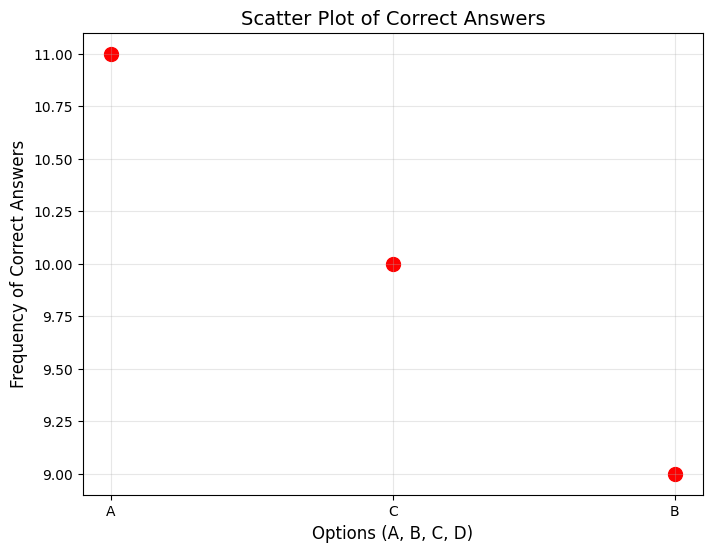

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the quiz questions CSV file
quiz_df = pd.read_csv("quiz_questions.csv")

# Filter out rows with null data
quiz_df = quiz_df.dropna()

# Count occurrences of each correct answer option
answer_counts = quiz_df['Correct_Answer'].value_counts()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(answer_counts.index, answer_counts.values, color='red', s=100)

# Add labels and title
plt.title('Scatter Plot of Correct Answers', fontsize=14)
plt.xlabel('Options (A, B, C, D)', fontsize=12)
plt.ylabel('Frequency of Correct Answers', fontsize=12)

# Add grid for better readability
plt.grid(alpha=0.3)

# Show the scatter plot
plt.show()
